ColDefs(
    name = 'APOGEE_ID'; format = '18A'
    name = 'TELESCOPE'; format = '8A'
    name = 'FIELD'; format = '16A'
    name = 'J'; format = 'E'
    name = 'J_ERR'; format = 'E'
    name = 'H'; format = 'E'
    name = 'H_ERR'; format = 'E'
    name = 'K'; format = 'E'
    name = 'K_ERR'; format = 'E'
    name = 'RA'; format = 'D'
    name = 'DEC'; format = 'D'
    name = 'GLON'; format = 'D'
    name = 'GLAT'; format = 'D'
    name = 'APOGEE_TARGET1'; format = 'J'
    name = 'APOGEE_TARGET2'; format = 'J'
    name = 'APOGEE_TARGET3'; format = 'J'
    name = 'APOGEE2_TARGET1'; format = 'J'
    name = 'APOGEE2_TARGET2'; format = 'J'
    name = 'APOGEE2_TARGET3'; format = 'J'
    name = 'TARGFLAGS'; format = '192A'
    name = 'SURVEY'; format = '35A'
    name = 'PROGRAMNAME'; format = '18A'
    name = 'NINST'; format = '3J'
    name = 'NVISITS'; format = 'J'
    name = 'COMBTYPE'; format = 'J'
    name = 'COMMISS'; format = 'I'
    name = 'SNR'; format = 'E'
    name = 'STARFLAG'; fo

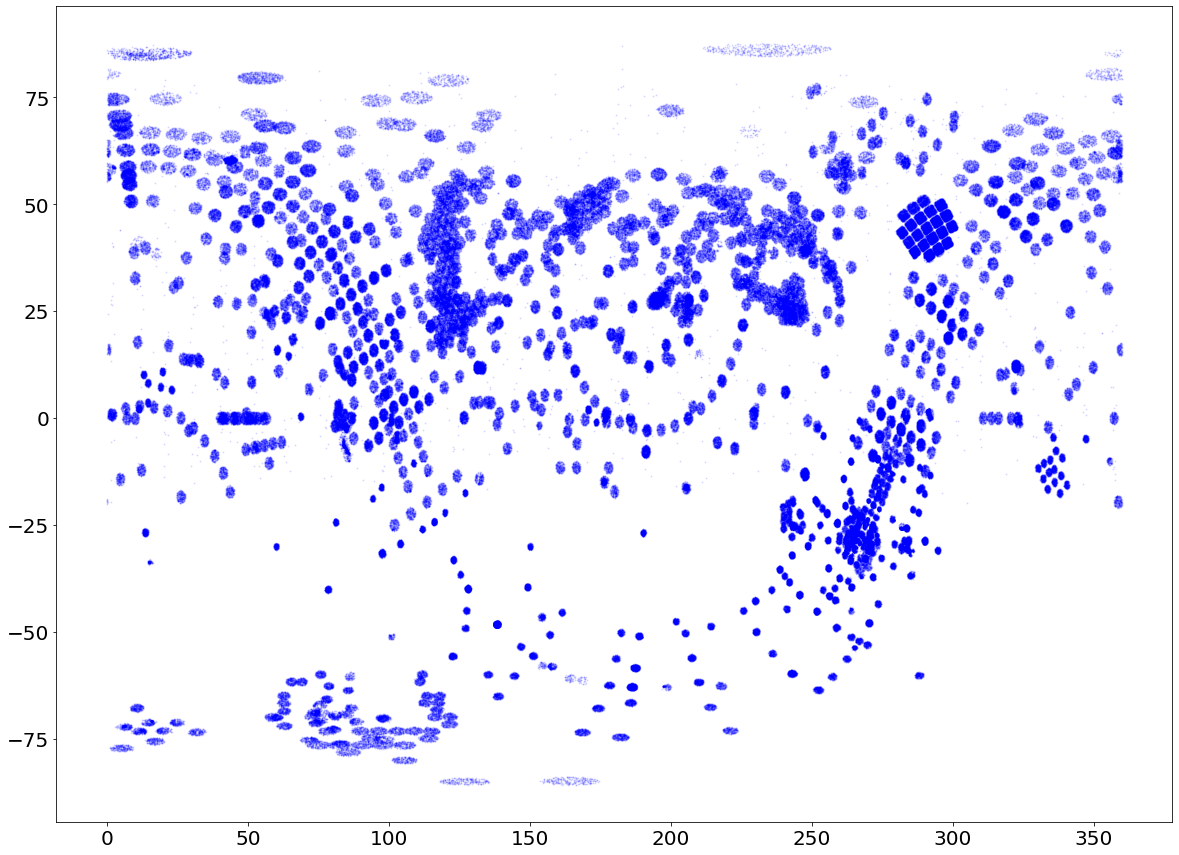

In [1]:
from matplotlib import pyplot as plt
import numpy as np
from astropy.io import fits 
import scipy.optimize as opt

# POTENTIAL FITTING FUNCTIONS
def linear(x,m,b):
    return m*x+b

def poly2(x,a,b,c):
    return a*(x**2)+(b*x)+c

def poly3(x,a,b,c,d):
    return (a*(x**3))+(b*(x**2))+(c*x)+d

def exponential(x,a,b,c,d):
    return a*np.exp(b*x + c) + d

def cosfit (x,a,b,c,d):
    return a*np.cos(b*x + c) + d

def logfit(x,a,b,c,d):
    return a*np.log(b*x + c) + d

def gausian(x,mu,sigma):
    part1 = (1.0/np.sqrt(2*np.pi*sigma**2))
    return (part1*(np.exp((-1*x - mu)**2/(2*sigma**2))))

def lorentzian_cauchy (x,a,b,c):
    return (c)*(b**2/((x-a)**2 + b**2))

def sigmoid(x,a,b,c,d):
    return (c/(1 + np.exp(-b*(x-a))) + d)
# READ IN FITS FILES
star_hdus = fits.open('allStarLite-r12-l33.fits')
star = star_hdus[1].data
print(star_hdus[1].columns)
star_hdus.close()

# TWO BITWISE FLAGS FOR BAD DATA             
badbits = 2**23        # aspcapstar flag - Chemistry
suspectbits = 2**16    # star flag - Stellar parameters

# Make a Boolena Mask to remove bad data
gd = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star['starflag'], suspectbits) == 0) 
good = np.where(gd)[0]

# PLOT TO VERIFY FITS FILE READ IN & BAD MASK DATA
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111)
ax.scatter(star['RA'][good],star['DEC'][good],s=1,c='b',alpha=0.1)

ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
plt.show()

ColDefs(
    name = 'APOGEE_ID'; format = '18A'
    name = 'TELESCOPE'; format = '8A'
    name = 'FIELD'; format = '16A'
    name = 'J'; format = 'E'
    name = 'J_ERR'; format = 'E'
    name = 'H'; format = 'E'
    name = 'H_ERR'; format = 'E'
    name = 'K'; format = 'E'
    name = 'K_ERR'; format = 'E'
    name = 'RA'; format = 'D'
    name = 'DEC'; format = 'D'
    name = 'GLON'; format = 'D'
    name = 'GLAT'; format = 'D'
    name = 'APOGEE_TARGET1'; format = 'J'
    name = 'APOGEE_TARGET2'; format = 'J'
    name = 'APOGEE_TARGET3'; format = 'J'
    name = 'APOGEE2_TARGET1'; format = 'J'
    name = 'APOGEE2_TARGET2'; format = 'J'
    name = 'APOGEE2_TARGET3'; format = 'J'
    name = 'TARGFLAGS'; format = '192A'
    name = 'SURVEY'; format = '35A'
    name = 'PROGRAMNAME'; format = '18A'
    name = 'NINST'; format = '3J'
    name = 'NVISITS'; format = 'J'
    name = 'COMBTYPE'; format = 'J'
    name = 'COMMISS'; format = 'I'
    name = 'SNR'; format = 'E'
    name = 'STARFLAG'; fo

IndexError: index 2 is out of bounds for axis 0 with size 2

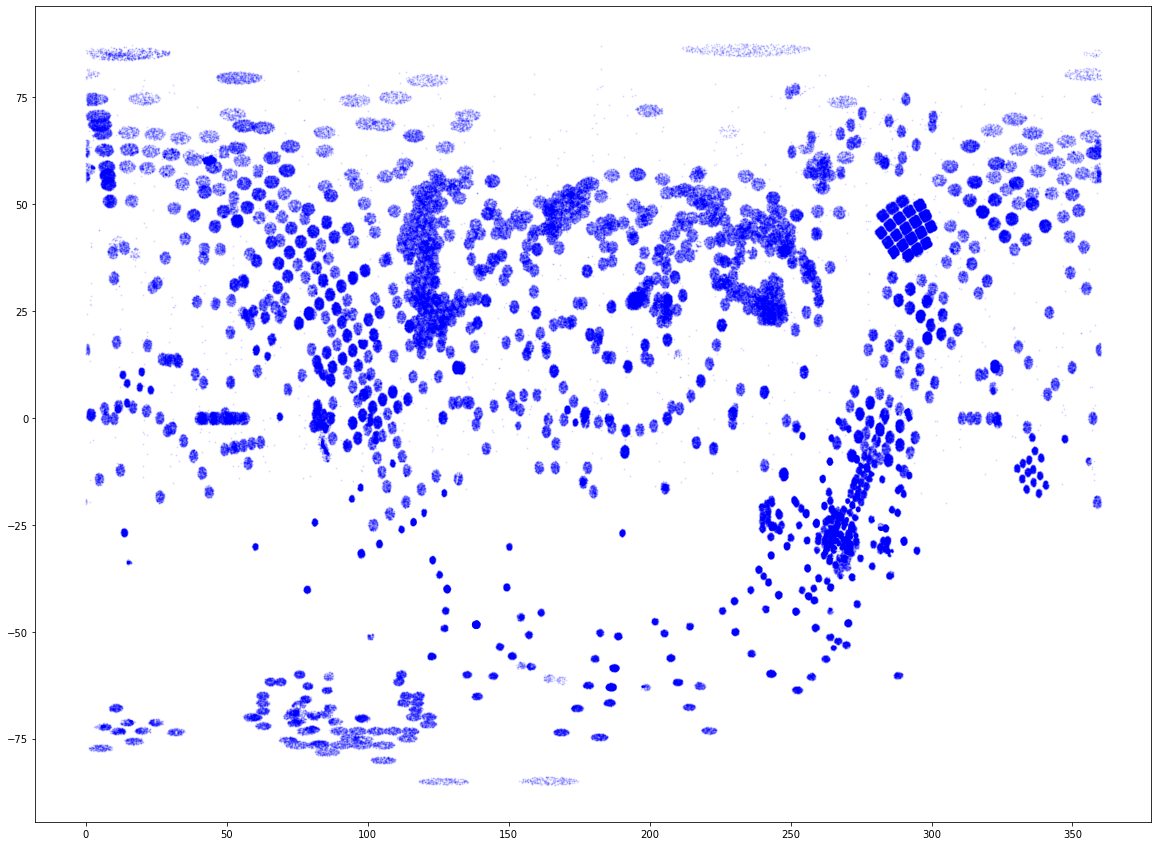

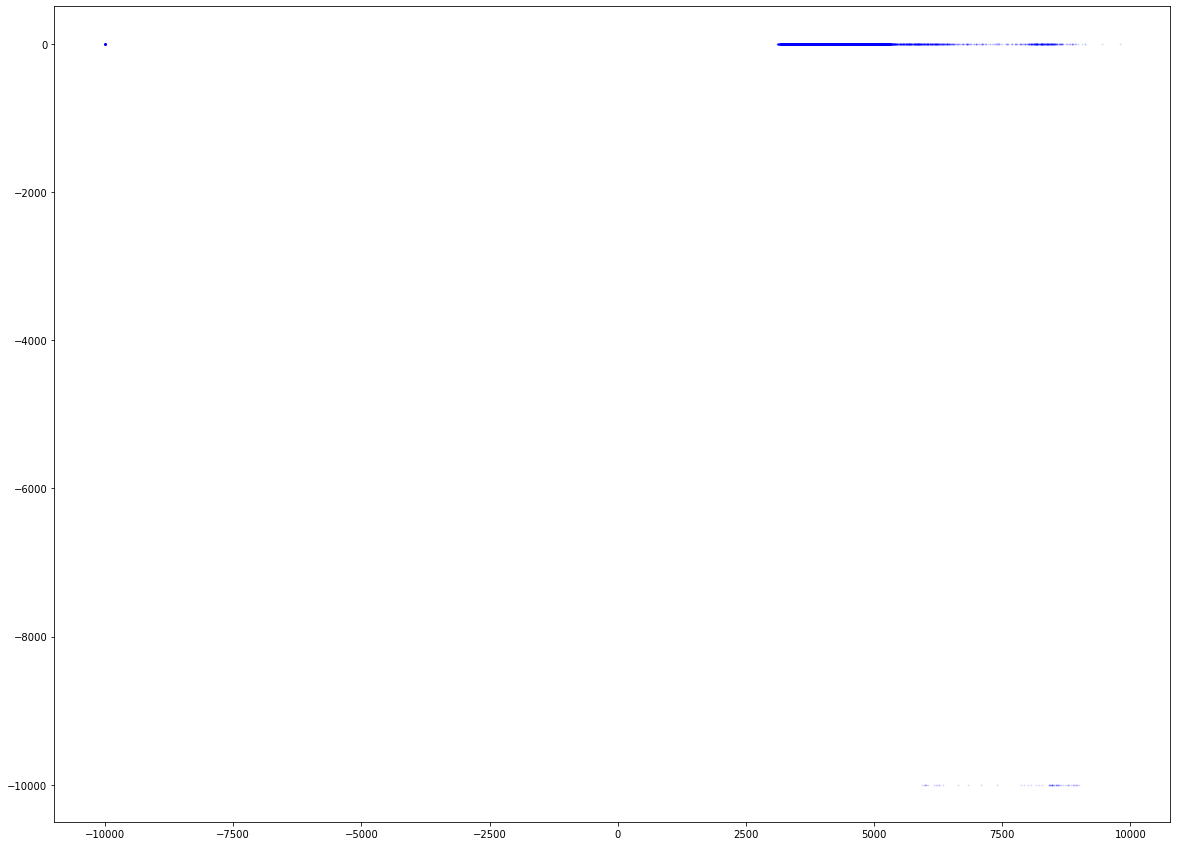

In [39]:
from matplotlib import pyplot as plt
import numpy as np
from astropy.io import fits 
import scipy.optimize as opt

def linear(x,m,b):
    return m*x+b

def mcFit(x, x_err, y, y_err):
    a = list ()
    b = list ()
    c = list ()
    iters = (300)
    for i in range (300):
        weight_y = np.random.randn(len(y))
        weight_x = np.random.randn(len(y))

        x_adj = x + x_err*weight_y
        y_adj = y + y_err*weight_x
        
        params, other = opt.curve_fit(linear, x_adj, y_adj)
        a.append(params[0])
        b.append(params[1])
        c.append(params[2])
    return a, b, c
        
star_hdus = fits.open('allStarLite-r12-l33.fits')
star = star_hdus[1].data
print(star_hdus[1].columns)
star_hdus.close()
            
badbits = 2**23        
suspectbits = 2**16    

# Make a Boolena Mask to remove bad data
gd = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star['starflag'], suspectbits) == 0) 
good = np.where(gd)[0]

fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111)
ax.scatter(star['RA'][good],star['DEC'][good],s=1,c='b',alpha=0.1)

gd2 = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star['starflag'], suspectbits) == 0) &\
    (star['GLAT']>= -1) & (star['GLAT'] <= 1)
good2 = np.where(gd2)[0]

fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111)
ax.scatter(star['TEFF'][good2],star['LOGG'][good2],s=1,c='b',alpha=0.1)

a1, b2, c3 = mcFit(star['TEFF'][good2], star['TEFF_ERR'][good2], star['LOGG'][good2], star['LOGG_ERR'][good2])
print(np.mean(a1), np.mean(b2), np.mean(c3))
                                                     
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111)
ax.scatter(star['TEFF'][good2],star['LOGG'][good2],s=1,c='b',alpha=0.1)
ax.errorbar(star['TEFF'][good2], star['LOGG'][good2],yerr= star['LOGG'][good2], c='tab:gray', 
            fmt='.', markersize=1, capsize=3 ,zorder=0)


gd3 = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star['starflag'], suspectbits) == 0) &\
    (star['GLAT']>= -10) & (star['GLAT'] <= 10)
good3 = np.where(gd3)[0]

a1, b2, c3 = mcFit(star['FE_H'][good3], star['FE_H_ERR'][good3], star['O_FE'][good3], star['O_FE_ERR'][good3])
print(np.mean(a1), np.mean(b2), np.mean(c3))

fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111)
ax.scatter(star['Fe_H'][good3],star['O_FE'][good3],s=1,c='b',alpha=0.1)
ax.errorbar(star['Fe_H'][good3], star['O_FE'][good3],yerr= star['O_FE_ERR'][good3], c='tab:gray', 
            fmt='.', markersize=1, capsize=3 ,zorder=0)



gd4 = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star['starflag'], suspectbits) == 0) &\
    (star['GLAT']>= -2) & (star['GLAT'] <= 2)
good4 = np.where(gd4)[0]

a1, b2, c3 = mcFit(star['Fe_H'][good4], star['O_FE'][good4], star['FE_H_ERR'][good4], star['O_FE_ERR'][good4])
print(np.mean(a1), np.mean(b2), np.mean(c3))

fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111)
ax.scatter(star['Fe_H'][good4],star['O_FE'][good4],s=1,c='b',alpha=0.1)
ax.errorbar(star['Fe_H'][good4], star['O_FE'][good4],yerr= star['O_FE_ERR'][good4], c='tab:gray', 
            fmt='.', markersize=1, capsize=3 ,zorder=0)


gd5 = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star['starflag'], suspectbits) == 0) &\
    (star['GLAT']>= -10) & (star['GLAT'] <= 10)
good5 = np.where(gd5)[0]

a1, b2, c3 = mcFit(star['TEFF'][good5], star['J-K'][good5], star['TEFF_ERR'][good5], star['J_ERR'][good5])
print(np.mean(a1), np.mean(b2), np.mean(c3))


fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111)
ax.scatter(star['TEFF'][good5],star['J-K'][good5],s=1,c='b',alpha=0.1)
ax.errorbar(star['TEFF'][good5], star['J-K'][good5],yerr= star['TEFF_ERR'][good2], c='tab:gray', 
            fmt='.', markersize=1, capsize=3 ,zorder=0)


gd6 = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star['starflag'], suspectbits) == 0) &\
    (star['GLAT']>= -10) & (star['GLAT'] <= 10)
good6 = np.where(gd6)[0]

a1, b2, c3 = mcFit(star['GLON'][good6], star['VHEIlO_AVG'][good6],star['VERR'][good6])
print(np.mean(a1), np.mean(b2), np.mean(c3))

fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111)
ax.scatter(star['GLON'][good6],star['VHEILO_AVG'][good6],s=1,c='b',alpha=0.1)
x.errorbar(star['GLON'][good6], star['VEHEILO_AVG'][good6],yerr= star['VERR'][good6], c='tab:gray', 
            fmt='.', markersize=1, capsize=3 ,zorder=0)



gd7 = (np.bitwise_and(star['aspcapflag'], badbits)==0) &\
     (np.bitwise_and(star['starflag'], suspectbits)==0) &\
    (star['NVISITS'] >= 1)  
good7 = np.where(gd7)[0] 

a1, b2, c3 = mcFit(star['NVISITS'][good7], star['VSCATTER'][good7], star['VERR'][good5])
print(np.mean(a1), np.mean(b2), np.mean(c3))

fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111)
ax.scatter(star['NVISITS'][good7],star['VSCATTER'][good7],s=1,c='b',alpha=0.1)
x.errorbar(star['NVISITS'][good7], star['VSCATTER'][good7],yerr= star['VERR'][good7], c='tab:gray', 
            fmt='.', markersize=1, capsize=3 ,zorder=0)



gd8 = (np.bitwise_and(star['aspcapflag'], badbits)==0) &\
     (np.bitwise_and(star['starflag'], suspectbits)==0) 
good8 = np.where(gd8)[0] 

a1, b2, c3 = mcFit(star['FE_H'][good8], star['FE_H_ERR'][good8], star['NI_FE'][good8], star['NI_FE_ERR'][good8])
print(np.mean(a1), np.mean(b2), np.mean(c3))

fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111)
ax.scatter(star['FE_H'][good8],star['NI_FE'][good8],s=1,c='b',alpha=0.1)
x.errorbar(star['FE_H'][good8], star['NI_FE'][good8],yerr= star['NI_FE_ERR'][good8], c='tab:gray', 
            fmt='.', markersize=1, capsize=3 ,zorder=0)



ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
plt.show()